# Where to look for data

- https://www.reddit.com/r/bigquery/wiki/datasets
- Kaggle
- wikipedia datasets
- datos.gob
- data.gov
- stanford NLP datasets and others
- CMU datasets
- MNIST
- MNIST-Fashion
- Image-Net
- Twitter
- Facebook
- Facebook AI research (FAIR)
- Instagram?

# Re-Indexing

In [43]:
import pandas as pd

In [44]:
df=pd.DataFrame({'A':[1,2,3],'B':[6,5,4]}) #, index=['Q',2,3])

In [45]:
df

,A,B
0,1,6
1,2,5
2,3,4


In [46]:
df = df.reindex([0,1,2,3,4])

In [47]:
df

,A,B
0,1.0,6.0
1,2.0,5.0
2,3.0,4.0
3,NaN,NaN
4,NaN,NaN


In [48]:
df =df.reindex([0,1,2,3,4,5,6], fill_value=0)
print(df)

     A    B
0  1.0  6.0
1  2.0  5.0
2  3.0  4.0
3  NaN  NaN
4  NaN  NaN
5  0.0  0.0
6  0.0  0.0


# Drop Entry

In [49]:
df=df.dropna()

In [50]:
df

,A,B
0,1.0,6.0
1,2.0,5.0
2,3.0,4.0
5,0.0,0.0
6,0.0,0.0


In [51]:
df.drop(1)

,A,B
0,1.0,6.0
2,3.0,4.0
5,0.0,0.0
6,0.0,0.0


In [52]:
df

,A,B
0,1.0,6.0
1,2.0,5.0
2,3.0,4.0
5,0.0,0.0
6,0.0,0.0


In [53]:
df.drop('A', axis=1)

,B
0,6.0
1,5.0
2,4.0
5,0.0
6,0.0


In [54]:
df

,A,B
0,1.0,6.0
1,2.0,5.0
2,3.0,4.0
5,0.0,0.0
6,0.0,0.0


In [55]:
# Remember that for a change to be permanent you have to set df = df.drop(something)

df = df.drop('A',axis=1)
print(df)

     B
0  6.0
1  5.0
2  4.0
5  0.0
6  0.0


# Fill with the mean

In [56]:
df=pd.DataFrame({'A':[1,2,3],'B':[6,5,4]}) #, index=['Q',2,3])
df =df.reindex([0,1,2,3])
df

,A,B
0,1.0,6.0
1,2.0,5.0
2,3.0,4.0
3,NaN,NaN


In [57]:
df.fillna(df.mean(), inplace=True)
df

,A,B
0,1.0,6.0
1,2.0,5.0
2,3.0,4.0
3,2.0,5.0


# Selecting Entries

In [60]:
df['C']=[1,2,3,4]

In [61]:
df

,A,B,C
0,1.0,6.0,1
1,2.0,5.0,2
2,3.0,4.0,3
3,2.0,5.0,4


In [62]:
df['C'][3]

4

In [63]:
df['B'][2]

4.0

In [134]:
# df['B'][3]  # this should throw an error

In [64]:
list('ABCDEFG')

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [65]:
df.loc[0]

A    1.0
B    6.0
C    1.0
Name: 0, dtype: float64

In [66]:
df

,A,B,C
0,1.0,6.0,1
1,2.0,5.0,2
2,3.0,4.0,3
3,2.0,5.0,4


# Sorting DataFrames

In [67]:
df2=pd.DataFrame([[1,2],[3,4]], index=list('BA'))

In [68]:
df2

,0,1
B,1,2
A,3,4


In [69]:
df2.sort_index()

,0,1
A,3,4
B,1,2


# Basic operations

In [70]:
df

,A,B,C
0,1.0,6.0,1
1,2.0,5.0,2
2,3.0,4.0,3
3,2.0,5.0,4


In [71]:
df.sum()

A     8.0
B    20.0
C    10.0
dtype: float64

In [72]:
df.cumsum()

,A,B,C
0,1.0,6.0,1.0
1,3.0,11.0,3.0
2,6.0,15.0,6.0
3,8.0,20.0,10.0


# Pivoting

In [73]:
import pandas as pd
df1 = pd.read_csv('unpivot.csv')

In [74]:
df1

,date,variable,value
0,03/01/2000,A,-0.046463
1,04/01/2000,A,-0.173593
2,05/01/2000,A,1.131152
3,03/01/2000,B,-0.114660
4,04/01/2000,B,0.141919
5,05/01/2000,B,-0.939512
6,03/01/2000,C,2.165012
7,04/01/2000,C,-0.850759
8,05/01/2000,C,-0.799248
9,03/01/2000,D,-1.522259


In [75]:
# df.pivot(ROWS,COLUMNS,VALUES)
df_pivot = df1.pivot('date','variable','value')

In [76]:
df_pivot

variable,A,B,C,D
date,,,,
03/01/2000,-0.046463,-0.114660,2.165012,-1.522259
04/01/2000,-0.173593,0.141919,-0.850759,1.116091
05/01/2000,1.131152,-0.939512,-0.799248,0.297002


# Mapping

In [82]:
dframe = pd.DataFrame({'city':['Tepic','Guadalajara','Las demas', 'Tepic'],
                    'altitude':[1000,8000,10000,1000]})

In [83]:
dframe

,altitude,city
0,1000,Tepic
1,8000,Guadalajara
2,10000,Las demas
3,1000,Tepic


In [84]:
Estados={'Tepic':'Nayarit','Guadalajara':'Jalisco','Las demas':'Algun estado'}

In [85]:
dframe['State'] = dframe['city'].map(Estados)

In [86]:
dframe

,altitude,city,State
0,1000,Tepic,Nayarit
1,8000,Guadalajara,Jalisco
2,10000,Las demas,Algun estado
3,1000,Tepic,Nayarit


# Let's Analyze the cannabis Industry

In [89]:
import pandas_datareader as pdr
import datetime

Get data from yahoo stocks

In [90]:
stocks = pdr.get_data_yahoo(['WEED.TO','ACB.TO','BP','BTI'],start=datetime.datetime(2017,1,1), end= datetime.datetime(2019,1,30))


In [91]:
stocks.head()

Attributes   High                                  Low                        \
Symbols    ACB.TO         BP        BTI WEED.TO ACB.TO         BP        BTI   
Date                                                                           
2017-01-03   2.43  38.119999  56.680000    9.47   2.29  37.790001  56.290001   
2017-01-04   2.42  38.340000  56.575001   10.16   2.39  37.939999  55.880001   
2017-01-05   2.47  38.680000  57.075001   10.39   2.39  38.139999  56.430000   
2017-01-06   2.47  38.189999  56.529999    9.97   2.42  37.849998  56.160000   
2017-01-09   2.60  37.650002  56.994999   10.09   2.44  37.310001  56.494999   

Attributes           Open              ...        Close             Volume  \
Symbols    WEED.TO ACB.TO         BP   ...          BTI WEED.TO     ACB.TO   
Date                                   ...                                   
2017-01-03    9.15   2.30  38.099998   ...    56.494999    9.39  3731900.0   
2017-01-04    9.45   2.42  38.049999   ...    56.369999   10.16  2183200.0   
2017-01-05    9.71   2.43  38.139999   ...    56.430000    9.88  2633600.0   
2017-01-06    9.65   2.47  38.160000   ...    56.275002    9.78  1515500.0   
2017-01-09    9.79   2.46  37.580002   ...    56.855000    9.92  4021800.0   

Attributes                                  Adj Close                        \
Symbols            BP        BTI    WEED.TO    ACB.TO         BP        BTI   
Date                                                                          
2017-01-03  8779200.0  1290400.0  1193100.0      2.38  33.643776  50.758522   
2017-01-04  6883300.0  4436400.0  2587000.0      2.41  33.900536  50.646210   
2017-01-05  6505700.0  3662800.0  2971000.0      2.47  34.148438  50.700115   
2017-01-06  5800900.0  1408400.0  1345400.0      2.44  33.564102  50.560863   
2017-01-09  5487400.0  2640000.0  1571300.0      2.59  33.032883  51.081963   

Attributes          
Symbols    WEED.TO  
Date                
2017-01-03    9.39  
2017-01-04   10.16  
2017-01-05    9.88  
2017-01-06    9.78  
2017-01-09    9.92  

[5 rows x 24 columns]

In [93]:

stocks.loc['2017-01-30':'2019-01-30']['Close']

Symbols,ACB.TO,BP,BTI,WEED.TO
Date,,,,
2017-01-30,2.27,35.959999,60.994999,9.820000
2017-01-31,2.27,35.980000,61.599998,9.850000
2017-02-01,2.30,35.990002,61.404999,10.050000
2017-02-02,2.30,35.790001,61.490002,10.160000
2017-02-03,2.28,35.919998,62.275002,10.520000
2017-02-06,2.34,35.820000,62.294998,11.630000
2017-02-07,2.42,34.380001,62.665001,11.470000
2017-02-08,2.52,34.430000,63.055000,11.930000
2017-02-09,2.58,34.439999,62.915001,12.060000


In [94]:
stocks = stocks.dropna()

In [79]:
stocks.loc['2017-01-30':'2019-01-30']['Close']

Symbols,ACB.TO,BP,BTI,WEED.TO
Date,,,,
2017-01-30,2.27,35.959999,60.994999,9.820000
2017-01-31,2.27,35.980000,61.599998,9.850000
2017-02-01,2.30,35.990002,61.404999,10.050000
2017-02-02,2.30,35.790001,61.490002,10.160000
2017-02-03,2.28,35.919998,62.275002,10.520000
2017-02-06,2.34,35.820000,62.294998,11.630000
2017-02-07,2.42,34.380001,62.665001,11.470000
2017-02-08,2.52,34.430000,63.055000,11.930000
2017-02-09,2.58,34.439999,62.915001,12.060000


In [96]:
type(stocks)

pandas.core.frame.DataFrame

In [97]:
stocks.to_csv('stocks.csv')

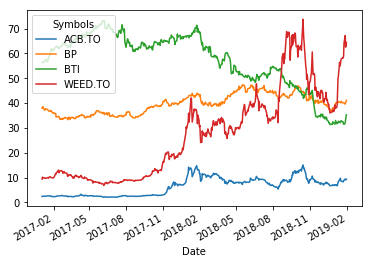

In [99]:
import matplotlib.pyplot as plt
stocks['Close'].plot()

In [117]:
returns = stocks['Close'].pct_change()

In [118]:
returns.columns

Index(['ACB.TO', 'BP', 'BTI', 'WEED.TO'], dtype='object', name='Symbols')

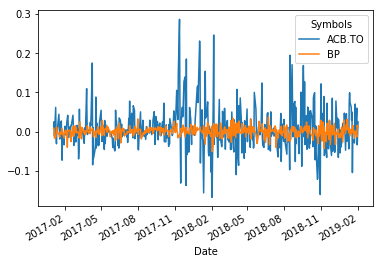

In [119]:
returns[['ACB.TO', 'BP']].plot()

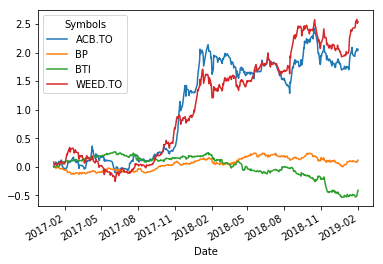

In [137]:
returns.cumsum().plot()

In [81]:
returns

Symbols,ACB.TO,BP,BTI,WEED.TO
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,0.012605,0.007632,-0.002213,0.082002
2017-01-05,0.024896,0.007313,0.001064,-0.027559
2017-01-06,-0.012146,-0.017112,-0.002747,-0.010121
2017-01-09,0.061475,-0.015827,0.010306,0.014315
2017-01-10,-0.015444,-0.005361,-0.002462,-0.015121
2017-01-11,-0.031373,0.011857,0.008816,-0.002047
2017-01-12,0.008097,0.005593,0.004195,-0.008205
2017-01-13,0.004016,-0.002648,0.002611,0.003102


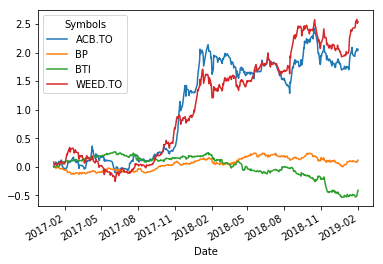

In [141]:
returns.cumsum().plot()

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

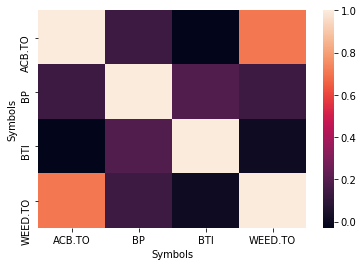

In [140]:
sns.heatmap(returns.corr())

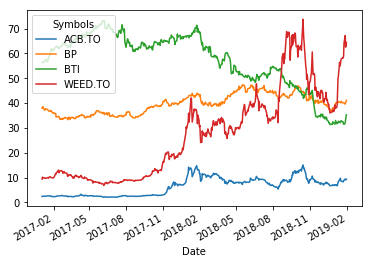

In [136]:
stocks['Close'].plot()

#### Compare the stock prices of WEED.T vs British Petroleum

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [177]:
#stocks = pdr.get_data_yahoo(['WEED.TO','ACB.TO','BP','BTI'],start=datetime.datetime(2017,1,1), end= datetime.datetime(2019,1,30))

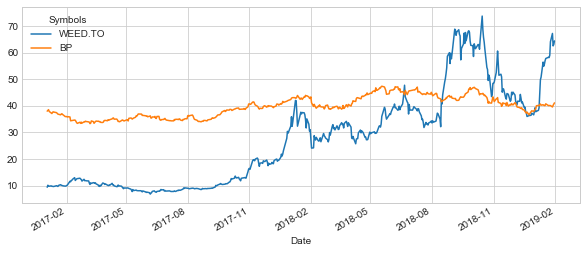

In [178]:
stocks['Close'][['WEED.TO','BP']].plot(legend=True,figsize=(10,4))

Now, plot the volume of the stocks being traded

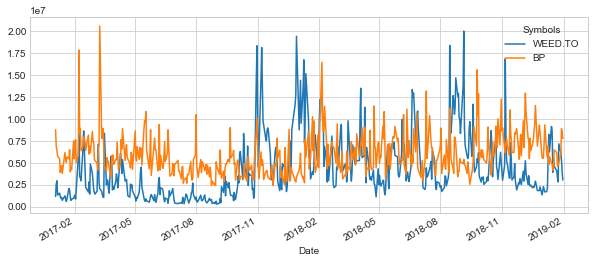

In [179]:
stocks['Volume'][['WEED.TO','BP']].plot(legend=True,figsize=(10,4))

### Let's compute the moving average of the stocks for windows sizes of: 10, 20, 30 for the Close price of British petroleum

In [180]:
MA = [10,20,30]
for window in MA:
    column_name = 'MA' + str(window)
    stocks[column_name]=stocks['Close']['BP'].rolling(window).mean()

In [181]:
#stocks2.head(11)

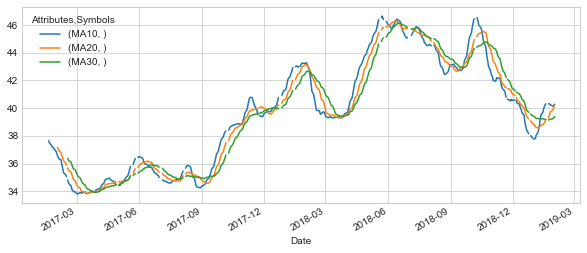

In [182]:
stocks2[['MA10','MA20','MA30']].plot(subplots=False,figsize=(10,4))

### Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure

In [83]:
returns.head()

Symbols,ACB.TO,BP,BTI,WEED.TO
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,0.012605,0.007632,-0.002213,0.082002
2017-01-05,0.024896,0.007313,0.001064,-0.027559
2017-01-06,-0.012146,-0.017112,-0.002747,-0.010121
2017-01-09,0.061475,-0.015827,0.010306,0.014315


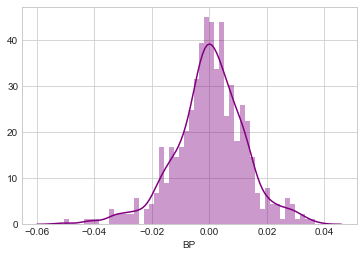

In [188]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(returns['BP'].dropna(),bins=50,color='purple')

# Could have also done:
#AAPL['Daily Return'].hist()

In [80]:
Constellation Brands, vegan, love, pepsico, camila cabello

SyntaxError: invalid syntax (<ipython-input-80-034e1947942f>, line 1)